<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/ML_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - No Supervisado

Las librerias más utilizadas son scikit-learn, TensorFlow y keras

### Lets Go!!

In [0]:
## Se importan las librerias
from sklearn import datasets 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
## cargamos un dataset de la libreria sklearn
ds = datasets.load_iris()
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Ahora visualicemos datos y miremos como se agrupan


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
110                6.5               3.2                5.1               2.0


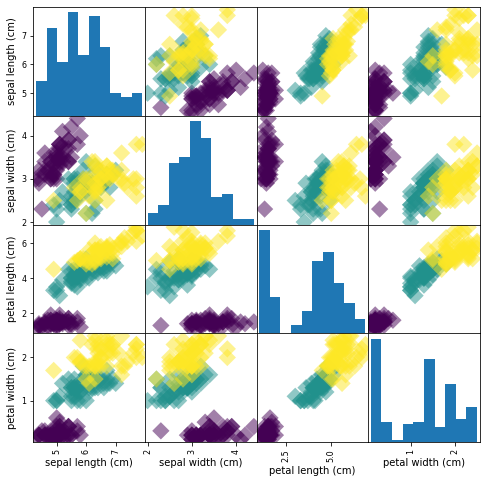

In [9]:
X = ds.data  
y = ds.target
df = pd.DataFrame(X, columns=ds.feature_names) 
print(df.sample())
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],s=150, marker = 'D');

NameError: ignored

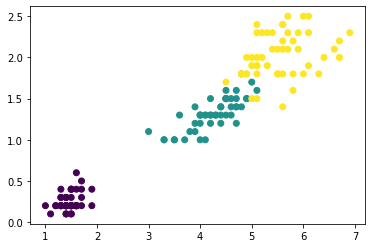

In [10]:
# Si graficamos solo la información de sepalos y miramos como se agrupan asi misma por colores
x_index = 2 
y_index = 3
plt.scatter(ds.data[:, x_index], ds.data[:, y_index], c=ds.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(ds.feature_names[x_index])
plt.ylabel(ds.feature_names[y_index])
plt.show()

## 1. K-Means: Intuición

#### Fit / Predict

In [0]:
from sklearn.cluster import KMeans 
# se crea el modelo 
kmeans  = KMeans(n_clusters=3,init = 'k-means++', random_state = 42) 
# se ajusta el modelo a los datos 
kmeans.fit(X, y)

In [0]:
y_kmeans = kmeans.fit_predict(X)

In [0]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, x_index], X[y_kmeans == 0, y_index], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, x_index], X[y_kmeans == 1, y_index], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, x_index], X[y_kmeans == 2, y_index], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroide')
plt.title('Clusters de especies')
plt.xlabel(ds.feature_names[x_index])
plt.ylabel(ds.feature_names[y_index])
plt.legend(loc='best'	)
plt.show()

### Miremos un poco más de K-means
Metodo del codo


In [0]:
resultados = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    resultados.append(kmeans.inertia_)
plt.plot(range(1, 11), resultados)
plt.title('Metodo del codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

**Ejercico**: Ahora vamos nosotros

In [0]:
# cargar el archivo que esta en la siguiente ruta en un dataframe
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/clientes_centro_comercial.txt')
# obtener los datos que se van a agrupar (no incluir la variable objetivo)
X = dataset.iloc[:, [3, 4]].values

In [0]:
# Aplicar el metodo del codo para encontrar el mejor K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [0]:
# ajustar el modelo con el K encontrado y pintarlo
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# graficar los cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Clusters de clientes')
plt.xlabel('Ganancias anuales')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()

## Dendograma

In [0]:
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/clientes_centro_comercial.txt')
X = dataset.iloc[:, [3, 4]].values

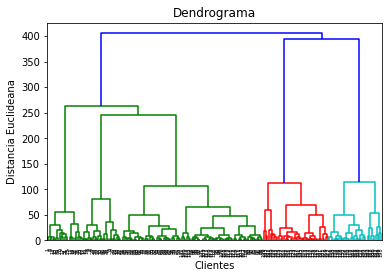

In [13]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclideana')
plt.show()

### 2.1 Definio datos y target

In [0]:
X = df.drop('target', axis=1).values   
y = df['target'].values

In [0]:
## visualizo los datos
x_cuartos = X[:,5]       
plt.scatter(x_cuartos, y)  
plt.ylabel('Costo de la casa)')  
plt.xlabel('# Cuartos') 
plt.show()

### 2.2 Genero el modelo 

In [0]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Defino el modelo 
reg = LinearRegression() 
reg

In [0]:
# Ajusto lova lores
reg.fit(x_cuartos.reshape(-1, 1), y.reshape(-1, 1))

In [0]:
# creo la linea 
prediction_space = np.linspace(min(x_cuartos),max(x_cuartos)).reshape(-1, 1)
plt.scatter(x_cuartos, y)  
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.ylabel('Costo de la casa)')  
plt.xlabel('# Cuartos') 
plt.show()

In [0]:
# genero mis datos set de datos uno de entrenamiento y otro de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [0]:
reg.fit(X_train,y_train)

In [0]:
reg.predict(X_test)

In [0]:
reg.score(X_test,y_test)

### 3. Regresión con multiples variables

En 4 pasos

In [0]:
# Paso 1- la librerias y datos que necesitamos 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import pandas as pd
# cargo los datos 
datos = datasets.load_wine()
df = pd.DataFrame(datos.data, columns=datos.feature_names)
df['target'] = pd.Series(datos.target)

In [0]:
df.head()

In [0]:
# Paso 2 Genero mis datos de entrenamiento y rpuebas 
X = datos.data
y = datos.target
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state=42)

In [0]:
# Paso 3 - Creo mi modelo de regresión exactament eigual que tuvieramos un solo dato
regresion = LinearRegression()
regresion.fit(X_train, y_train)  
y_pred = regresion.predict(X_test)
print(len(y_test))
y_pred

In [0]:
# Paso 4 - Compruebo los resultados
regresion.score(X_test, y_test)

### 4. Validación cruzada

In [0]:
# Paso 1 - Importamos librerias
from sklearn.model_selection import cross_val_score  
from sklearn.linear_model import LinearRegression


In [0]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)  
print(cv_results)


In [0]:
np.mean(cv_results)


In [0]:
from sklearn.linear_model import Lasso
names = df.drop('target', axis=1).columns  
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')  
plt.show()


### 5. Matriz de confusión

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
iris = datasets.load_iris()  


In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)   


In [0]:
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))

In [0]:
print(classification_report(y_test, y_pred))

### 6. Identificar los mejores parametros

In [0]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 50)} 
knn = KNeighborsClassifier()  
knn_cv = GridSearchCV(knn, param_grid, cv=5) 
knn_cv.fit(X, y) 
knn_cv.best_params_

In [0]:
knn_cv.best_score_

### 7. Normalización de los datos


In [0]:
from sklearn.preprocessing import scale
X  = iris.data

In [0]:
X

In [0]:
X_scaled = scale(X) 

In [0]:
X_scaled

In [0]:
np.mean(X), np.std(X) 

In [0]:
np.mean(X_scaled), np.std(X_scaled)

### 8. Información categorica

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
## ML
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=1,suppress=True)

In [0]:

url = 'https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/fondo_inversion.csv'
dataset = pd.read_csv(url)
dataset.head()


In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [0]:
X

In [0]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X

In [0]:
ct =ColumnTransformer([('encoder', OneHotEncoder(), [3])],remainder='passthrough')
X= np.array(ct.fit_transform(X), dtype=np.float)

In [0]:
X

### 9. Información faltante

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [0]:
# Importing the dataset
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [0]:
dataset.info()

In [0]:
X

In [0]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,1:3])


In [0]:
X[:,1:3]=imputer.transform(X[:,1:3])

In [0]:
X